In [14]:
# Re-import necessary libraries after kernel reset
import pandas as pd

# Reload the Excel files
sales_df = pd.read_excel("Sales.xlsx")
expenses_df = pd.read_excel("expenses.xlsx")

# Preview the first few rows of each dataset
sales_df.head(), expenses_df.head()


(             Revenue  Gross Sales:   Net Sales:  Unnamed: 3
 0              ACCOM   27512145.60  21493863.75      2022.0
 1  AIRPORT TRANSFERS     305800.00    259152.54      2022.0
 2               BEVE    7974618.85   6457181.25      2022.0
 3         CONFERENCE    5354849.71   4183476.33      2022.0
 4          EXCURSION     139400.00    118135.59      2022.0,
          Department Name:       Total  Unnamed: 2
 0  ADMIN & GENERAL OFFICE   649148.00      2022.0
 1              CONFERENCE   285679.85      2022.0
 2                     NaN         NaN         NaN
 3            DISPENSE BAR  1227273.10      2022.0
 4                     NaN         NaN         NaN)

In [15]:
# Clean and rename columns for consistency

# Clean sales data
sales_df = sales_df.dropna(subset=["Revenue"])  # Drop empty rows
sales_df.columns = ["Category", "Gross Sales", "Net Sales", "Year"]
sales_df["Year"] = sales_df["Year"].astype(int)

# Clean expenses data
expenses_df = expenses_df.dropna(subset=["Department Name:"])  # Drop empty rows
expenses_df.columns = ["Department", "Total Expense", "Year"]
expenses_df["Year"] = expenses_df["Year"].astype(int)

# Summarize total revenue and expenses per year
revenue_by_year = sales_df.groupby("Year")["Net Sales"].sum()
expenses_by_year = expenses_df.groupby("Year")["Total Expense"].sum()

# Combine into one DataFrame for comparison
summary_df = pd.DataFrame({
    "Total Revenue": revenue_by_year,
    "Total Expenses": expenses_by_year
})

summary_df


,Total Revenue,Total Expenses
Year,,
2022,52857511.91,9627001.00
2023,59168167.18,14761977.02
2024,66174768.96,22033515.68


In [8]:
sales_df.head()

,Category,Gross Sales,Net Sales,Year
0,ACCOM,27512145.60,21493863.75,2022
1,AIRPORT TRANSFERS,305800.00,259152.54,2022
2,BEVE,7974618.85,6457181.25,2022
3,CONFERENCE,5354849.71,4183476.33,2022
4,EXCURSION,139400.00,118135.59,2022


In [9]:
sales_df.tail()

,Category,Gross Sales,Net Sales,Year
54,PRINTING & PHOTOCOPYING,40460.0,34288.14,2024
55,ROOM SERVICE,139000.0,117796.61,2024
56,SWIMMING -MONTHLY,8000.0,6779.66,2024
57,SWIMMING-DAILY,666620.0,564932.20,2024
58,TRANSPORTATION,39600.0,33559.32,2024


In [10]:
# Pivot the sales data: categories as columns, years as rows
sales_pivot = sales_df.pivot_table(
    index="Year",
    columns="Category",
    values="Net Sales",
    aggfunc="sum"  # Use sum in case there are duplicate entries
)

# Display the result
sales_pivot.round(2)


Category,ACCOM,AIRPORT TRANSFERS,BEVE,CONFERENCE,EXCURSION,FACILITY HIRE,FOOD,FOOD ON ACCOMODATION,GYM-ANNUALLY,GYM-DAILY,GYM-MONTHLY,LAUNDRY AND DRY CLEANING,MISCELLANEOUS,NO SHOW,PRINTING & PHOTOCOPYING,ROOM SERVICE,SWIMMING -MONTHLY,SWIMMING-DAILY,TRANSPORTATION
Year,,,,,,,,,,,,,,,,,,,
2022,21493863.75,259152.54,6457181.25,4183476.33,118135.59,80478.81,12218608.80,6847265.63,79144.07,40084.75,98135.59,134834.75,42418.0,9570.31,45381.36,102542.37,13559.32,589738.01,43940.68
2023,25909249.22,296419.49,6702019.34,4605510.24,53389.83,NaN,13090823.83,7077734.38,NaN,67966.10,173220.34,212088.98,40211.0,71093.75,56491.53,93644.07,NaN,668728.81,49576.27
2024,29192178.13,196610.17,6532275.30,7960312.50,27118.64,21186.44,14043867.97,6835937.50,NaN,82161.02,92372.88,204923.73,189250.0,39218.75,34288.14,117796.61,6779.66,564932.20,33559.32


In [11]:
# Export to CSV
output_path = "sales_pivot_by_year.csv"
sales_pivot.to_csv(output_path)

output_path

'sales_pivot_by_year.csv'

In [17]:
# Pivot: rows = Year, columns = Department, values = Total Expense
expenses_pivot = expenses_df.pivot_table(
    index="Year",
    columns="Department",
    values="Total Expense",
    aggfunc="sum"
)

# Export to CSV
expenses_output_path = "expenses_pivot_by_year.csv"
expenses_pivot.to_csv(expenses_output_path)

expenses_output_path


'expenses_pivot_by_year.csv'

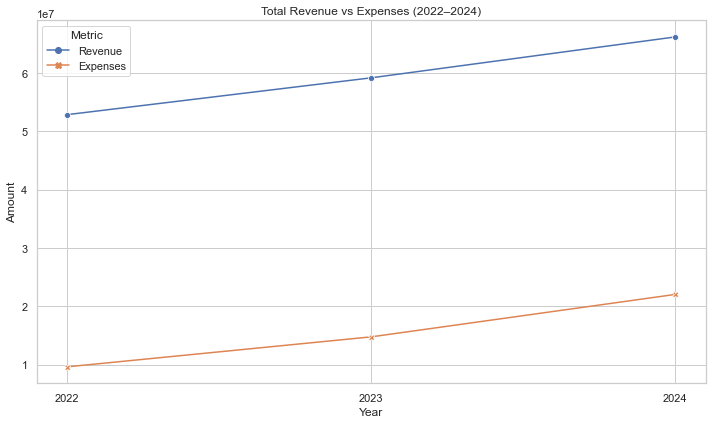

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns


# Summarize totals by year
total_revenue = sales_df.groupby("Year")["Net Sales"].sum()
total_expenses = expenses_df.groupby("Year")["Total Expense"].sum()

# Combine into one DataFrame
summary_df = pd.DataFrame({
    "Revenue": total_revenue,
    "Expenses": total_expenses
})

# Plot the trends
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=summary_df, markers=True, dashes=False)
plt.title("Total Revenue vs Expenses (2022–2024)")
plt.xlabel("Year")
plt.ylabel("Amount")
plt.xticks(summary_df.index)
plt.legend(title="Metric")
plt.tight_layout()
plt.show()
